In [1]:
print("Hello")

Hello


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score
from codecarbon import EmissionsTracker
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [3]:
hur_df = pd.read_csv("../clean_data/all_hurricane_wo_effects.csv")
# print(hur_df)

In [4]:

features = hur_df[['Min_Pressure(mb.)', 'Humidity(%)', '200-850_hPA Shear(kt.)', 'Sea_Surface_Temp(Celsius)']]
target = hur_df['Max_Winds(kt.)']

# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")


Training features shape: (112, 4)
Testing features shape: (28, 4)


In [5]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared Score: {r2}")


Mean Absolute Error (MAE): 7.735714285714287
R-squared Score: 0.9074438016528925


                     Feature  Importance
0          Min_Pressure(mb.)    0.966198
3  Sea_Surface_Temp(Celsius)    0.015902
2     200-850_hPA Shear(kt.)    0.011246
1                Humidity(%)    0.006654


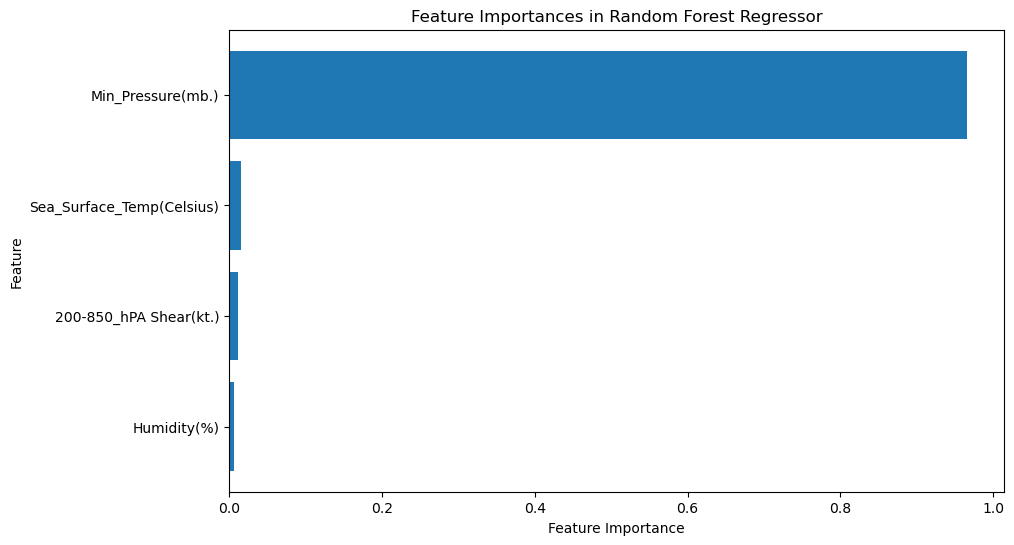

In [6]:
feature_importances = rf_regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': features.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()


In [7]:
tracker = EmissionsTracker()
tracker.start()

rf_regressor.fit(X_train, y_train)

emissions = tracker.stop()

print(f"Carbon emissions (kg CO2): {emissions}")

[codecarbon INFO @ 02:17:47] [setup] RAM Tracking...
[codecarbon INFO @ 02:17:47] [setup] GPU Tracking...
[codecarbon INFO @ 02:17:47] No GPU found.
[codecarbon INFO @ 02:17:47] [setup] CPU Tracking...
[codecarbon WARNING @ 02:17:47] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 02:17:47] CPU Model on constant consumption mode: Apple M1 Pro
[codecarbon INFO @ 02:17:47] >>> Tracker's metadata:
[codecarbon INFO @ 02:17:47]   Platform system: macOS-14.4-arm64-arm-64bit
[codecarbon INFO @ 02:17:47]   Python version: 3.12.6
[codecarbon INFO @ 02:17:47]   CodeCarbon version: 2.8.0
[codecarbon INFO @ 02:17:47]   Available RAM : 16.000 GB
[codecarbon INFO @ 02:17:47]   CPU count: 10
[codecarbon INFO @ 02:17:47]   CPU model: Apple M1 Pro
[codecarbon INFO @ 02:17:47]   GPU count: None
[codecarbon INFO @ 02:17:47]   GPU model: None
[codecarbon INFO @ 02:17:50] Saving emissions 

Carbon emissions (kg CO2): 3.510007834151876e-08


In [8]:
# Define features and target without 'Class_Category'
features = hur_df[['Min_Pressure(mb.)', 'Humidity(%)', '200-850_hPA Shear(kt.)', 'Sea_Surface_Temp(Celsius)']]
target = hur_df['Max_Winds(kt.)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

lr_mae = mean_absolute_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print(f"Linear Regression - MAE: {lr_mae}")
print(f"Linear Regression - R2 Score: {lr_r2}")


Linear Regression - MAE: 6.840608249460664
Linear Regression - R2 Score: 0.9300011923082707


In [9]:
print("Model Comparison for Regression:")
print(f"Random Forest - MAE: {mae}, R2 Score: {r2}")
print(f"Linear Regression - MAE: {lr_mae}, R2 Score: {lr_r2}")


Model Comparison for Regression:
Random Forest - MAE: 7.735714285714287, R2 Score: 0.9074438016528925
Linear Regression - MAE: 6.840608249460664, R2 Score: 0.9300011923082707


We see that MAE is significantly larger than R^2 implying that the Random Forest is not effectively modeling the relationship between 'max_winds'(target variable) and our features(humidity, wind_shear, SST, min_pressure). I think that the model isn't affectively learning the patterns so it's either trying to overfit or underfit, implying a bad generalization of the test set. 

- Humidity
- Wind Shear
- SST

These features might not capture the whole picture

--> We need more features
- atmospheric pressure trends, geographic locations (more)
- we only looked at atlantic

might be an issue